In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
biobert_embeddings_dict = np.load(
    "../data/all_biobert_embeddings.npy", allow_pickle=True
).item()

# Convert embeddings to matrix for analysis
embedding_keys = list(biobert_embeddings_dict.keys())
embedding_matrix = np.array([biobert_embeddings_dict[key] for key in embedding_keys])

print(f"Embedding matrix shape: {embedding_matrix.shape}")
print(f"Embedding dimension: {embedding_matrix.shape[1]}")
print(f"Number of samples: {embedding_matrix.shape[0]}")

Embedding matrix shape: (3908, 768)
Embedding dimension: 768
Number of samples: 3908


In [3]:
scaler = StandardScaler()
embedding_matrix_scaled = scaler.fit_transform(embedding_matrix)

pca = PCA()
pca_result = pca.fit_transform(embedding_matrix_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

components_90 = np.argmax(cumulative_variance >= 0.90) + 1
components_95 = np.argmax(cumulative_variance >= 0.95) + 1
components_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"First 20 components explain {cumulative_variance[19]:.4f} of the variance")
print(f"First 50 components explain {cumulative_variance[49]:.4f} of the variance")
print(f"First 100 components explain {cumulative_variance[99]:.4f} of the variance")
print(f"First 256 components explain {cumulative_variance[255]:.4f} of the variance\n")

print(f"Components needed for 90% variance: {components_90}")
print(f"Components needed for 95% variance: {components_95}")
print(f"Components needed for 99% variance: {components_99}\n")

print(
    f"Using 128 dimensions (>95% of variance): embedding-to-type feature ratio reduced from 110:1 to 18:1"
)

First 20 components explain 0.7925 of the variance
First 50 components explain 0.8835 of the variance
First 100 components explain 0.9375 of the variance
First 256 components explain 0.9834 of the variance

Components needed for 90% variance: 61
Components needed for 95% variance: 123
Components needed for 99% variance: 326

Using 128 dimensions (>95% of variance): embedding-to-type feature ratio reduced from 110:1 to 18:1


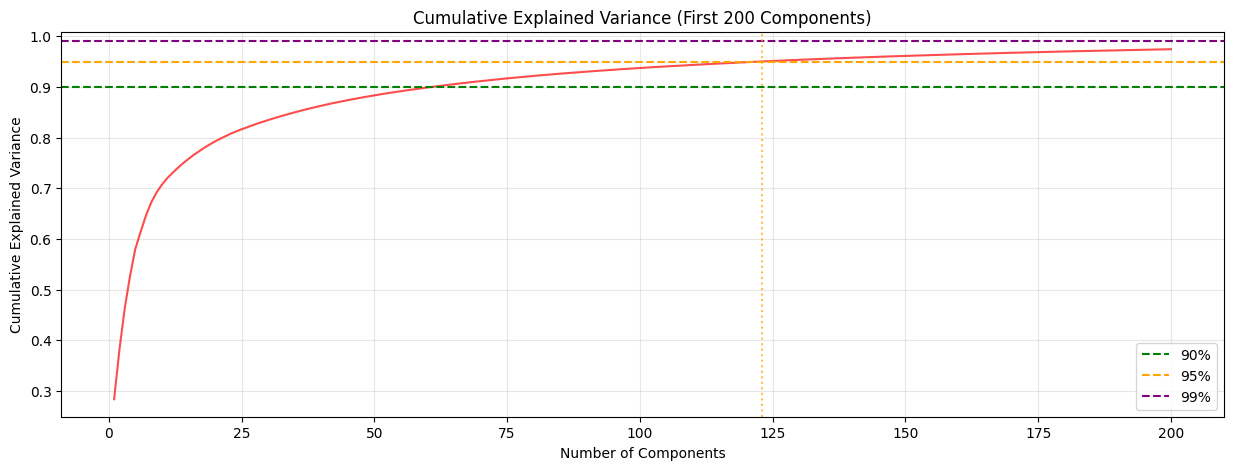

In [4]:
plt.figure(figsize=(15, 5))

plt.plot(
    range(1, min(201, len(cumulative_variance) + 1)),
    cumulative_variance[:200],
    "r-",
    alpha=0.7,
)
plt.axhline(y=0.90, color="g", linestyle="--", label="90%")
plt.axhline(y=0.95, color="orange", linestyle="--", label="95%")
plt.axhline(y=0.99, color="purple", linestyle="--", label="99%")
plt.axvline(x=components_95, color="orange", linestyle=":", alpha=0.7)
plt.title("Cumulative Explained Variance (First 200 Components)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

In [5]:
pca_128 = PCA(n_components=128)
reduced_embeddings_128 = pca_128.fit_transform(embedding_matrix_scaled)
print(f"Reduced embedding shape: {reduced_embeddings_128.shape}")
reduced_embeddings_dict = {
    key: reduced_embeddings_128[i] for i, key in enumerate(embedding_keys)
}

np.save("../data/all_biobert_embeddings_128_dim.npy", reduced_embeddings_dict)
print("Saved reduced embeddings to: ../data/all_biobert_embeddings_128_dim.npy")

Reduced embedding shape: (3908, 128)
Saved reduced embeddings to: ../data/all_biobert_embeddings_128_dim.npy


In [6]:
pca_50 = PCA(n_components=50)
reduced_embeddings_50 = pca_50.fit_transform(embedding_matrix_scaled)
print(f"Reduced embedding shape (50 components): {reduced_embeddings_50.shape}")
reduced_embeddings_dict_50 = {
    key: reduced_embeddings_50[i] for i, key in enumerate(embedding_keys)
}
np.save("../data/all_biobert_embeddings_50_dim.npy", reduced_embeddings_dict_50)
print("Saved reduced embeddings to: ../data/all_biobert_embeddings_50_dim.npy")

Reduced embedding shape (50 components): (3908, 50)
Saved reduced embeddings to: ../data/all_biobert_embeddings_50_dim.npy
